# Import Libraries

In [ ]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Import Dataset

In [ ]:

non_demented = []
mild = []
moderate = []
very_mild = []

for dirname, _, filenames in os.walk(r'...\Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk(r'...\Mild Dementia'):
    for filename in filenames:
        mild.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk(r'...\Moderate Dementia'):
    for filename in filenames:
        moderate.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk(r'...\Very mild Dementia'):
    for filename in filenames:
        very_mild.append(os.path.join(dirname, filename))



#### Datas in each Class are not Distributed Well so i use just 450 From each

In [ ]:
non_demented = non_demented[0:450]
mild = mild[0:450]
moderate = moderate[0:450]
very_mild = very_mild[0:450]

# One Hot Encoding

In [145]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

#### Resize and Put all categories together

In [ ]:
data = []
result = []
for p in non_demented:
    img = Image.open(p)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for p in mild:
    img = Image.open(p)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for p in moderate:
    img = Image.open(p)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())
        
for p in very_mild:
    img = Image.open(p)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())

In [147]:
data = np.array(data)
data.shape


(1800, 128, 128, 3)

In [148]:
result = np.array(result)
result = result.reshape((1800,4))
result.shape

(1800, 4)

# Splitting The Data

In [149]:
# 20% for test data 15% for validation data the rest for train data
x_temp,x_test,y_temp,y_test = train_test_split(data,result,test_size=0.2,shuffle=True,random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size=0.15,shuffle=True,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1224, 128, 128, 3)
(360, 128, 128, 3)
(216, 128, 128, 3)


# Creating Model: CNN

In [150]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),activation='relu',input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())

c:\Users\Taha\Desktop\Folder\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)              │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,586,628 (128.12 MB)

 Trainable params: 33,586,436 (128.12 MB)

 Non-trainable params: 192 (768.00 B)

None


In [151]:
y_train.shape  

(1224, 4)

In [152]:
x_train.shape

(1224, 128, 128, 3)

### Train for 10 Epochs and batchsize = 10

In [153]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10,verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.8456 - loss: 5.2292 - val_accuracy: 0.9398 - val_loss: 0.2267
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9877 - loss: 0.0983 - val_accuracy: 1.0000 - val_loss: 1.9886e-04
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9926 - loss: 0.0365 - val_accuracy: 1.0000 - val_loss: 1.1506e-06
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 15s 123ms/step - accuracy: 1.0000 - loss: 7.8339e-04 - val_accuracy: 1.0000 - val_loss: 3.8633e-08
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9959 - loss: 0.0252 - val_accuracy: 1.0000 - val_loss: 5.5189e-10
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.9967 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 1.2694e-08
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - accuracy: 0.9967 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 2.8147e-08
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step 

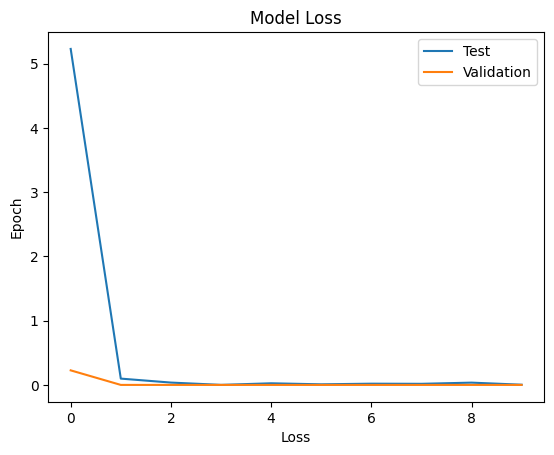

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

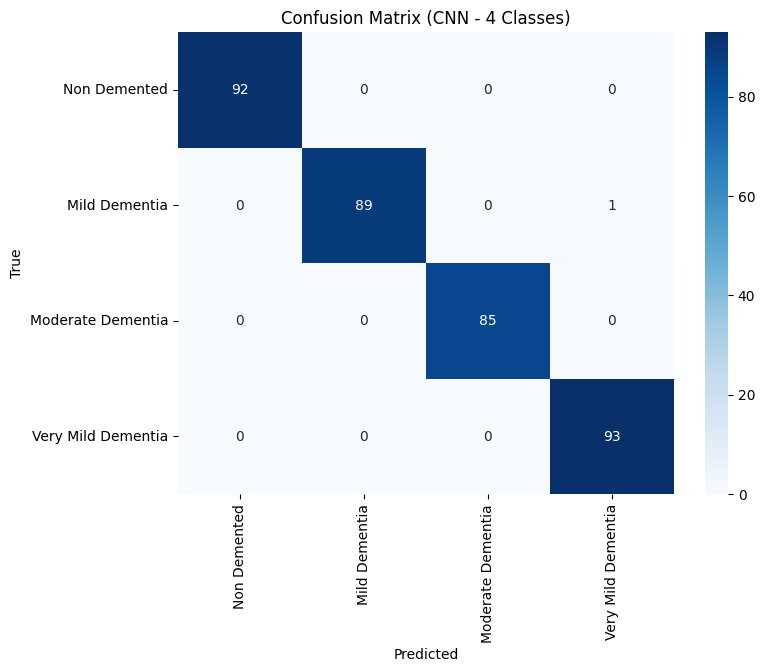

In [155]:

class_names = ['Non Demented','Mild Dementia','Moderate Dementia','Very Mild Dementia']

y_true = np.argmax(y_test, axis=1)
y_prob = model.predict(x_test, verbose=0)
y_pred = np.argmax(y_prob, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (CNN - 4 Classes)')
plt.show()


# Accuracy and Prediction

In [ ]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error'

#### 4 new picture to predict

100.00% Confidence This Is Mild Dementia
Mild.jpg
100.00% Confidence This Is Moderate Dementia
Moderate.jpg
100.00% Confidence This Is Non Demented
NonDemented.jpg
100.00% Confidence This Is Very Mild Dementia
VeryMild.jpg


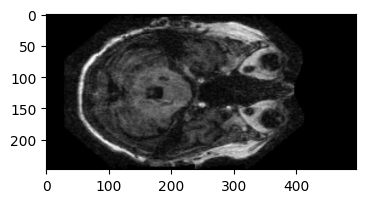

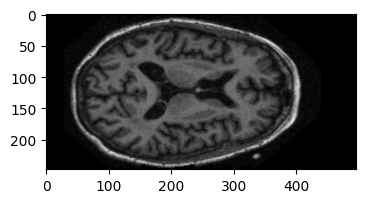

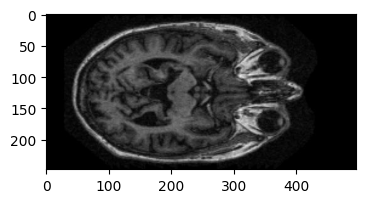

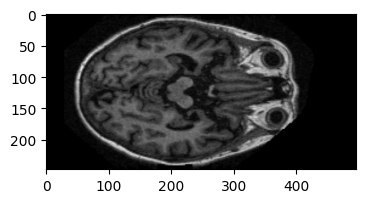

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow, figure
image_folder = r'...\Barresi Nahaee'  

for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)

    if img_path.lower().endswith(('.jpg', '.jpeg', '.png')):
        
        img = Image.open(img_path)
        
        x = np.array(img.resize((128, 128)))
        x = x.reshape(1, 128, 128, 3)
        
        res = model.predict_on_batch(x)
        classification = np.argmax(res, axis=1)[0]
        confidence = res[0][classification] * 100
        
        figure(figsize=(4,4))
        imshow(img)
        print(f"{confidence:.2f}% Confidence This Is {names(classification)}")
        print(img_name)